In [48]:
import ujson as json, re

def extract_answer(response):
    # extract everything between ```python and ```
    return response.split("```python")[1].split("```")[0]

all_logs = []
with open("logs/logs.jsonl", "r") as f:
    for line in f:
        log = json.loads(line)
        log["score"] = log["eval_result"]["score"]
        log["num_response_chars"] = len(log["response"])
        log["num_response_words"] = len(log["response"].split())
        log["num_response_lines"] = log["response"].count("\n")
        log["answer"] = extract_answer(log["response"])
        log["num_answer_chars"] = len(log["answer"])
        log["num_answer_words"] = len(log["answer"].split())
        log["num_answer_lines"] = log["answer"].count("\n")

        # the answer with all the comments stripped
        # Remove both single-line (# ...) and multi-line ('''...''' or """...""") comments
        log["answer2"] = re.sub(r'(\"\"\".*?\"\"\"|\'\'\'.*?\'\'\'|#.*?$)', '', log["answer"], flags=re.DOTALL | re.MULTILINE)
        log["answer2"] = "\n".join([line for line in log["answer2"].split("\n") if line.strip()]) # remove any empty lines

        log["num_answer2_chars"] = len(log["answer2"])
        log["num_answer2_words"] = len(log["answer2"].split())
        log["num_answer2_lines"] = log["answer2"].count("\n")
        all_logs.append(log)

print(len(all_logs))

193957


In [45]:
import numpy as np, pandas as pd

# pd show 200 rows
pd.set_option('display.max_rows', 200)

keys = ["score", "num_response_chars", "num_response_words", "num_response_lines", "num_answer_chars", "num_answer_words", "num_answer_lines", "num_answer2_chars", "num_answer2_words", "num_answer2_lines"]
avg_stats = {key: {} for key in keys}
task_responses, task_answers, task_answers2 = {}, {}, {}
for log in all_logs:
    task_id = log["task_id"]
    
    for key in keys:
        if task_id not in avg_stats[key]:
            avg_stats[key][task_id] = []
        avg_stats[key][task_id].append(log[key])

    if task_id not in task_responses:
        task_responses[task_id] = []
        task_answers[task_id] = []
        task_answers2[task_id] = []
    task_responses[task_id].append(log["response"])
    task_answers[task_id].append(log["answer"])
    task_answers2[task_id].append(log["answer2"])

dataset = []
task_ids = list(avg_stats["score"].keys())
for task_id in task_ids:
    row = {"task_id": task_id, "N": len(task_responses[task_id])}
    for key in keys:
        row[key] = np.mean(avg_stats[key][task_id])
    responses = task_responses[task_id]
    answers = task_answers[task_id]
    answers2 = task_answers2[task_id]
    row["unique_responses"] = 100.0 * len(set(responses)) / len(responses)
    row["unique_answers"] = 100.0 * len(set(answers)) / len(answers)
    row["unique_answers2"] = 100.0 * len(set(answers2)) / len(answers2)

    dataset.append(row)

dataset = sorted(dataset, key=lambda x: x["score"], reverse=True)
pd.DataFrame(dataset)

,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2
0,sharded-HumanEval/44,1922,1.000000,242.996358,32.827784,10.318418,230.996358,30.827784,10.318418,192.741935,26.111342,6.929240,13.683663,13.683663,8.376691
1,sharded-HumanEval/7,1910,1.000000,163.386911,23.128796,5.153403,151.314660,21.117801,5.151309,147.274869,21.000000,2.000000,0.680628,0.575916,0.104712
2,sharded-HumanEval/73,1926,1.000000,266.455867,39.452233,10.669782,254.455867,37.452233,10.669782,206.231568,30.069574,7.602804,5.140187,5.140187,2.803738
3,sharded-HumanEval/71,1924,1.000000,239.253119,57.618503,8.261954,227.253119,55.618503,8.261954,210.847193,53.334200,5.651767,7.016632,7.016632,3.638254
4,sharded-livecodebench/2876,1924,1.000000,136.109667,16.413721,3.752079,118.012994,13.424636,3.682432,114.786902,13.250520,1.560291,6.185031,4.469854,3.898129
5,sharded-HumanEval/111,1940,0.999485,344.438660,43.275258,10.853608,332.438660,41.275258,10.853608,267.919588,31.791237,6.578351,54.484536,54.484536,40.309278
6,sharded-HumanEval/43,1930,0.999482,256.064249,32.417098,11.112435,243.832642,30.374611,11.109326,151.361658,18.002591,5.996891,1.917098,1.813472,0.621762
7,sharded-livecodebench/2727,1937,0.998967,159.233867,20.707279,6.513681,145.030976,18.330924,6.484770,140.881776,17.919979,4.436242,8.156944,7.330924,4.956118
8,sharded-HumanEval/90,1917,0.998957,242.535211,29.756912,7.943662,230.535211,27.756912,7.943662,160.784559,17.495566,3.882629,10.954617,10.954617,7.042254
9,sharded-livecodebench/2881,1936,0.998450,265.608471,30.903926,8.049070,239.207645,26.683368,7.831095,203.978822,21.385847,5.209194,45.661157,44.421488,14.411157


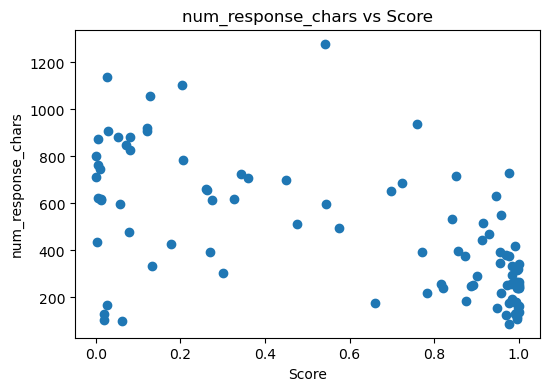

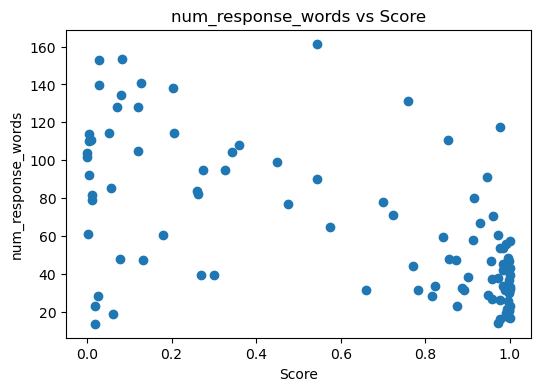

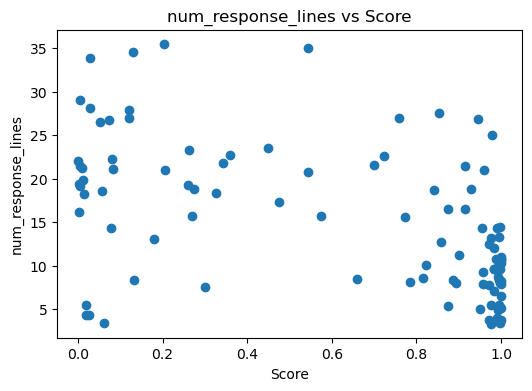

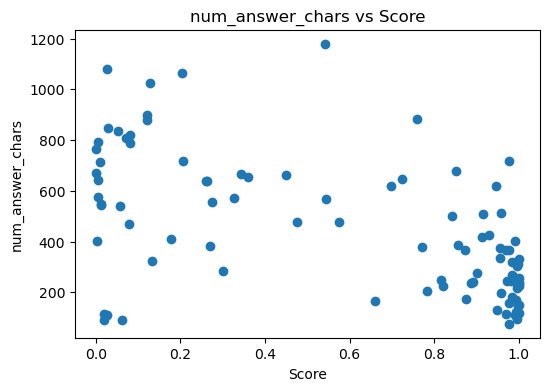

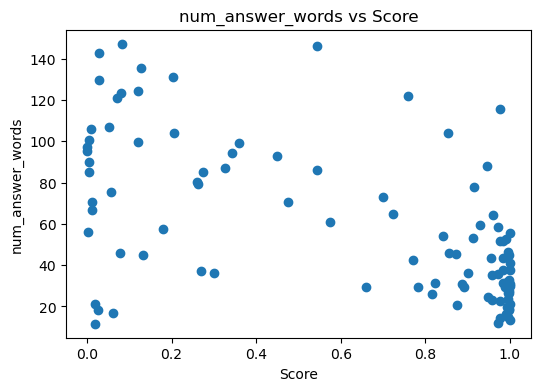

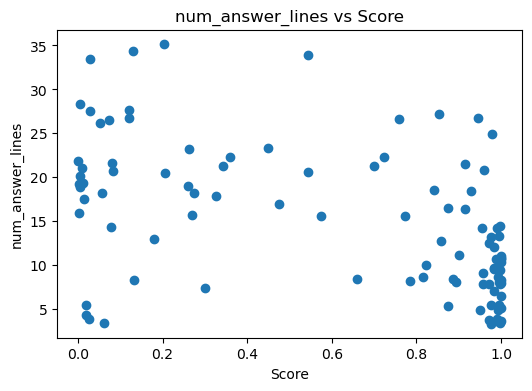

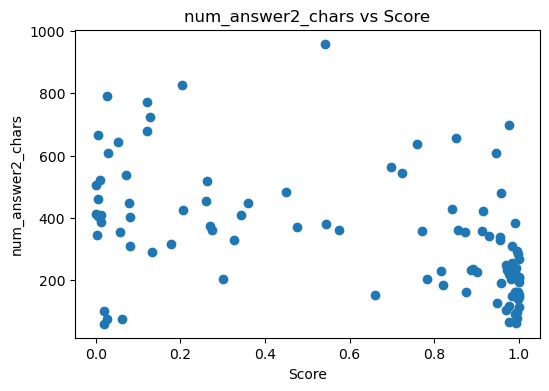

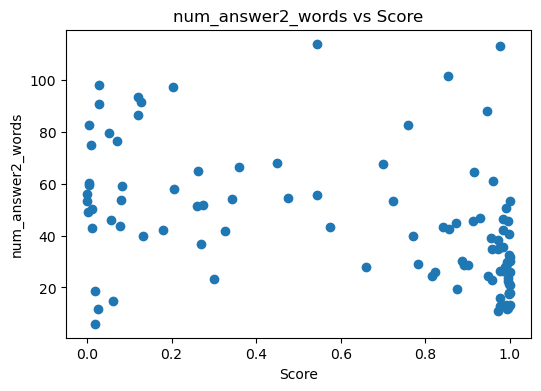

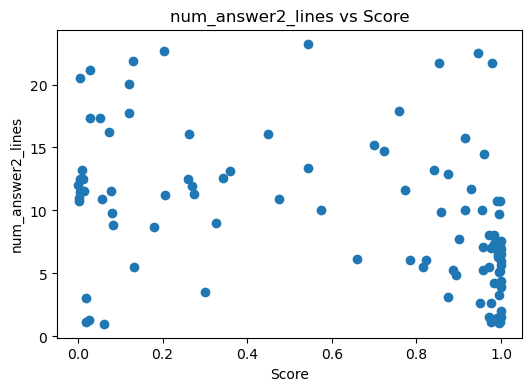

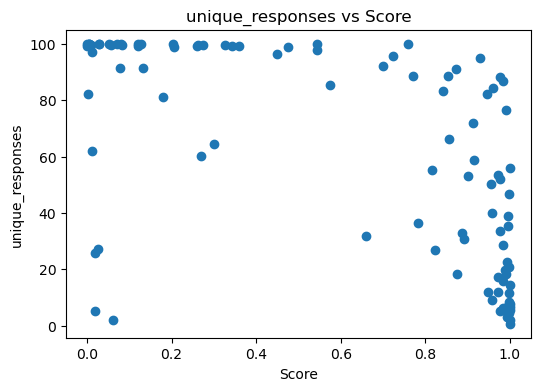

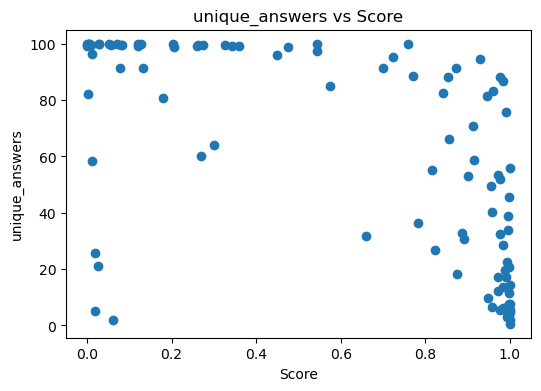

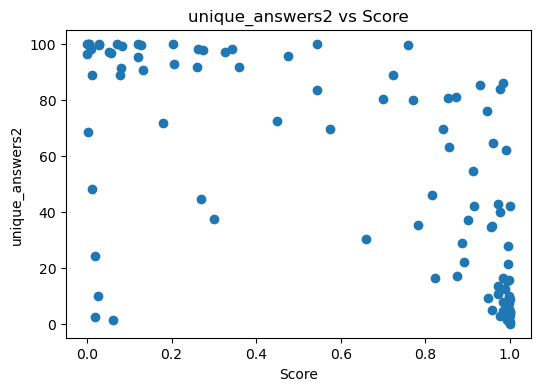

In [38]:
from matplotlib import pyplot as plt

scores = [row["score"] for row in dataset]
for k in keys + ["unique_responses", "unique_answers", "unique_answers2"]:
    if k == "score":
        continue
    values = [row[k] for row in dataset]
    plt.figure(figsize=(6, 4))
    plt.scatter(scores, values)
    plt.xlabel("Score")
    plt.ylabel(k)
    plt.title(f"{k} vs Score")
    plt.show()
